In [10]:
# # For logging in to hugging face
# from huggingface_hub import notebook_login
# notebook_login()

In [11]:
# %reload_ext autoreload
# %autoreload 2
# from VLA2Systems.joint_inference import System2Inference
# config_path = "./configs/joint_inference.yaml"
# S2Model = System2Inference(config_path)


In [12]:
# random index from the dataset
# output = S2Model(1)

In [13]:
# print(output)

In [ ]:
%reload_ext autoreload
%autoreload 2
import random
import gymnasium as gym
import minigrid
import matplotlib.pyplot as plt
from VLA2Systems.rl_utils import render_env
import torch
import imageio

env_name = "BabyAI-ActionObjDoor-v0"
# env_name = "BabyAI-OneRoomS8-v0"
# env_name = "BabyAI-BlockedUnlockPickup-v0"
# env_name = "BabyAI-FindObjS5-v0"
# env_name = "BabyAI-BossLevel-v0"
# env_name = "MiniGrid-MultiRoom-N6-v0"
# env_name = "MiniGrid-MultiRoom-N4-S5-v0"
# env_name = "BabyAI-UnlockToUnlock-v0"
# env_name = "BabyAI-BlockedUnlockPickup-v0"
seed = random.randint(1, 1000)
env = gym.make(env_name, render_mode="rgb_array")
from VLA2Systems.joint_inference import System2Inference
config_path = "./configs/joint_inference.yaml"
# Clear cache
torch.cuda.empty_cache()

S2Model = System2Inference(config_path, env)



Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
prompt = S2Model.get_input(env)
output = S2Model(env)
n = len(prompt)
response = output[n:]
print(S2Model.generator.mission)
S2Model.generator.visualize()
response

'### Instruction:\nGrid Map of the environment:\nWWWWWWWWWWWWWWWWWWW\nW.....W.....W.....W\nW.....W.....W.....W\nW.....W.....W.....W\nW.....W.....W.....W\nW.....W.....W.....W\nWWWWWWWWWDWWWWWWWWW\nW.....W.....W.....W\nW.....W....BW.....W\nW.....W..R.KW.....W\nW.....W...BKW.....W\nW.....DK....D.....W\nWWWWWWWWWWWDWWWWWWW\nW.....W.....W.....W\nW.....W.....W.....W\nW.....W.....W.....W\nW.....W.....W.....W\nW.....W.....W.....W\nWWWWWWWWWWWWWWWWWWW\nKnowledge Base:\nRoom 0 is empty\nRoom 1:\n  blue door is at (9, 6) and is currently closed\nRoom 2 is empty\nRoom 3:\n  green door is at (6, 11) and is currently closed\nRoom 4:\n  grey key is at (7, 11)\n  blue box is at (11, 8)\n  green key is at (11, 9)\n  purple box is at (10, 10)\n  purple key is at (11, 10)\n  blue door is at (9, 6) and is currently closed\n  green door is at (6, 11) and is currently closed\n  green door is at (12, 11) and is currently closed\n  purple door is at (11, 12) and is currently closed\nRoom 5:\n  green door is a

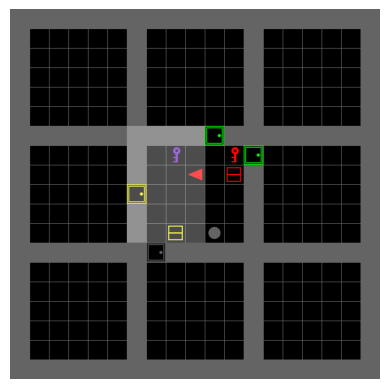

pick up the purple key


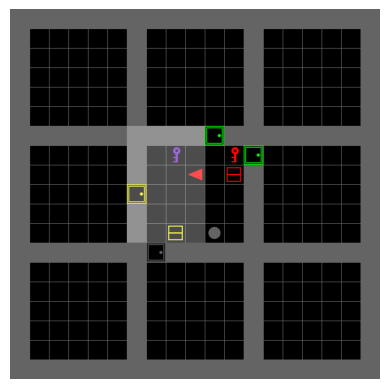

In [1]:
from VLA2Systems.joint_inference import System1Inferece
import random
import gymnasium as gym
import minigrid
import matplotlib.pyplot as plt
import torch
import imageio

env_name = "BabyAI-ActionObjDoor-v0"
# env_name = "BabyAI-BlockedUnlockPickup-v0"
seed = random.randint(1, 1000)
env = gym.make(env_name, render_mode="rgb_array")
config_path = "./configs/joint_inference.yaml"

S1Model = System1Inferece(config_path, env)
obs, _ = env.reset(seed=seed)
S1Model.config.verify = False
S1Model.step(obs["mission"], obs)
S1Model.config.verify = True
# obs["mission"]

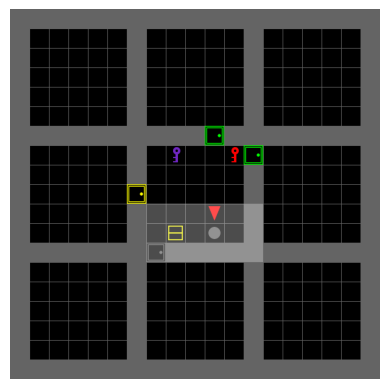

go to the grey ball
True


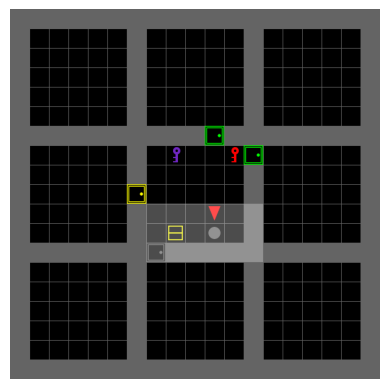

In [2]:
sub_task = "go to the grey ball"
S1Model.init_sub_task(sub_task, env)
S1Model.step_untill(sub_task)
